In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


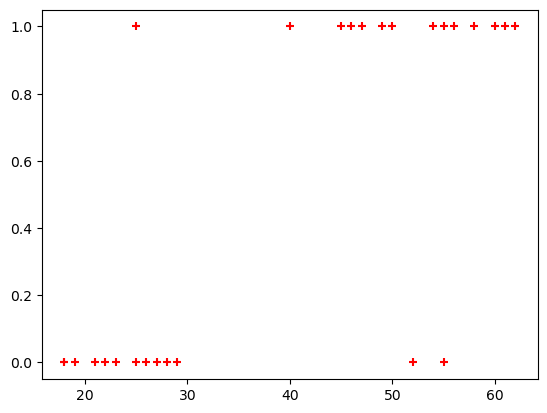

In [4]:
plt.scatter(df.age, df.bought_insurance, marker="+", color="red")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [6]:
len(X_train)

24

In [7]:
len(X_test)

3

In [8]:
X_test

,age
26,23
9,61
11,28


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
X_test

,age
26,23
9,61
11,28


In [12]:
model.predict(X_test)

array([0, 1, 0])

In [13]:
y_test

26    0
9     1
11    0
Name: bought_insurance, dtype: int64

In [15]:
model.predict([[5]])   # five year old person

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [17]:
model.predict([[90]]) 

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [18]:
model.predict_proba(X_test) 

array([[0.86890282, 0.13109718],
       [0.05354426, 0.94645574],
       [0.77980237, 0.22019763]])

In [19]:
model.score(X_test, y_test)

1.0

# Exercise

In [20]:
df = pd.read_csv("./data/HR_comma_sep.csv")

In [21]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data exploration and visualization

In [25]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [26]:
retained = df[df['left']==0]
retained.shape

(11428, 10)

**Average numbers for all columns**

In [27]:
df.groupby('left').mean()

/tmp/ipykernel_27581/588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1  **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)


2  **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)


3  **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

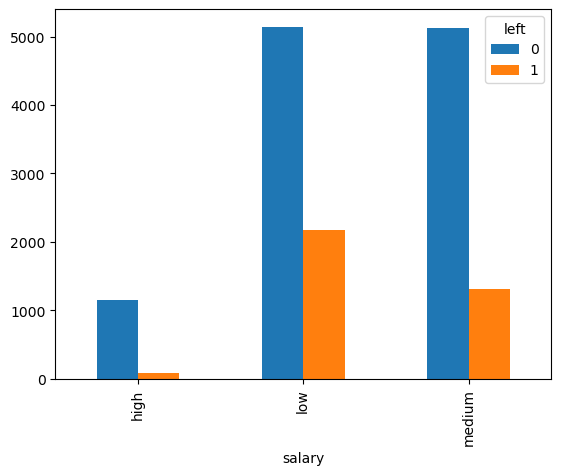

In [29]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

**Above bar chart shows employees with high salaries are likely to not leave the company**

**Department wise employee retentation rate**

<Axes: xlabel='Department'>

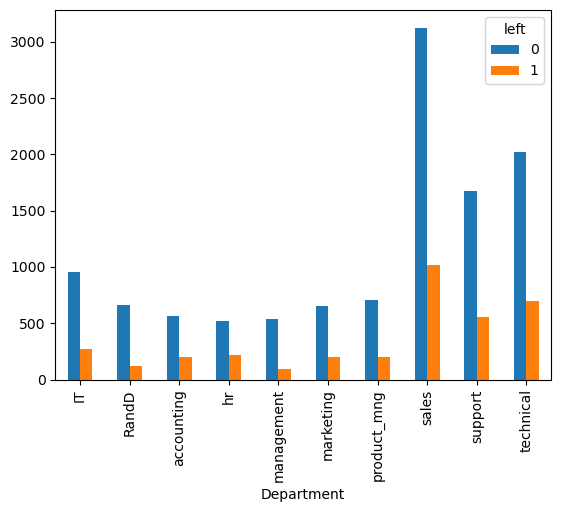

In [30]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1  **Satisfaction Level**


2  **Average Monthly Hours**


3  **Promotion Last 5 Years**


4  **Salary**

In [31]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [32]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [33]:
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [34]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [35]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [36]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [37]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [38]:
y = df.left

In [39]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [48]:
model.fit(X_train, y_train)

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

**Accuracy score of the model**

In [50]:
model.score(X_test, y_test)

0.771